# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

# Research Question 

## How are housing price and Homelessness attributes correlated? 


## Definitions


df = This is the first data, from kaggle that Have been scrapped from Realtor website. 

df2 = This is the second data, The Homelessness, in the period 2007 - 2016 - Kaggle. 


In [7]:
!python -m pip install kaggle==1.6.12

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

>I would like to work on Real estate in USA

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import requests
import zipfile
import json
import requests
import os



# Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

I gathered these 2 data because I am interested in the real estate market and its effects on societies. In this notebook I will study the market of USA and its impact on the number of homeless. 

### **1.2.** Gather at least two datasets using two different data gathering methods

## Dataset 1 
The first data set is a spreadsheet a full of informations about the USA housing data, prices, places and dates and of sold or not, I downlowded it manully from Kaggle, and this data was collected from https://www.realtor.com/ - A real estate listing website operated by the News Corp subsidiary Move, Inc. and based in Santa Clara, California. 
I choosed this dataset to study the housing market in USA. Download it manually. 


In [12]:
df = pd.read_csv("realtor-data.zip.csv")


## Dataset 2

The Seconed Dataset is about homelessness is USA it has 2 csv files, homlessness in the period 2007 - 2016 and population csv. 
These raw data sets contain Point-in-Time (PIT) estimates and national PIT estimates of homelessness as well as national estimates of homelessness by state and estimates of chronic homelessness from 2007 - 2016. Estimates of homeless veterans are also included beginning in 2011. The accompanying Housing Inventory Count (HIC) data is available as well from 2007 - 2016." (Department of Housing and Urban Development).
> Type: zip File, CSV File

> Method: The data was gathered using the "API" method from Kaggle.
> Dataset variables:
Index(['Year', 'State', 'CoC Number', 'CoC Name', 'Measures', count

omes in $1000's

In [14]:
import kaggle

In [15]:
from kaggle.api.kaggle_api_extended import KaggleApi


In [16]:
api = KaggleApi()
api.authenticate()
api.dataset_download_files("adamschroeder/homelessness",
                           "/2007-2016-Homelessnewss-USA.csv")

Dataset URL: https://www.kaggle.com/datasets/adamschroeder/homelessness


In [17]:

zip_file_path = "C:\\2007-2016-Homelessnewss-USA.csv\\homelessness.zip"

# Define the directory to extract the files to
extract_dir = "7-2016-Homelessnewss-USA.csv"  # Replace with the directory where you want to extract the files

# Unzip the downloaded file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Remove the downloaded zip file
os.remove(zip_file_path)






# Asses Virtually 

In [19]:
df2 = pd.read_csv('7-2016-Homelessnewss-USA.csv/2007-2016-Homelessnewss-USA.csv')

In [20]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


I have A lot of Nulls in The "prev_sold_date" 

In [22]:
df.tail(10)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2226372,108243.0,sold,425000.0,3.0,3.0,0.06,970797.0,Richland,Washington,99354.0,1876.0,2022-02-14
2226373,16235.0,sold,305000.0,4.0,2.0,0.42,353937.0,Richland,Washington,99354.0,2000.0,2022-02-11
2226374,53860.0,sold,310000.0,3.0,1.0,0.21,500240.0,Richland,Washington,99354.0,1152.0,2022-02-11
2226375,60631.0,sold,385000.0,4.0,2.0,0.21,210890.0,Richland,Washington,99354.0,1656.0,2022-03-28
2226376,85499.0,sold,339900.0,4.0,2.0,0.20,41160.0,Richland,Washington,99354.0,2780.0,2022-03-28
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24
2226381,108243.0,sold,580000.0,5.0,3.0,0.31,307704.0,Richland,Washington,99354.0,3615.0,2022-03-23


In [23]:
df.describe() 

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [24]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [25]:
!pip install kaggle

In [26]:
print(df.isnull().sum())


brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64


In [27]:
print(df.duplicated().sum())


0


Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

"dirty data and messy data.

Inaccurate data is an example of dirty data, i.e., a data quality issue. High data quality is crucial for obtaining reliable insights and driving informed decision-makin.

Unorganized data is an example of messy data, i.e., a data structural issue. With tidy data, we can focus on performing additional assessments and cleaning without dealing with roadblocks around getting the data into a structure that's easier to view and pa" 
 data.rse.

In [29]:
df2.head(10)

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,1/1/2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,1/1/2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842
5,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless Individuals,589
6,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless People in Families,253
7,1/1/2007,AK,AK-500,Anchorage CoC,Total Homeless,974
8,1/1/2007,AK,AK-500,Anchorage CoC,Unsheltered Chronically Homeless Individuals,37
9,1/1/2007,AK,AK-500,Anchorage CoC,Unsheltered Homeless,132


In [30]:
df2.tail(10)

,Year,State,CoC Number,CoC Name,Measures,Count
86519,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless,366
86520,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Individuals,240
86521,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless People in Families,126
86522,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Children (U...,2
86523,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Young Adult...,5
86524,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Veterans,31
86526,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth (Under 25),3
86527,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Age 18-24,3
86528,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Under 18,0


In [31]:
df2.describe()

,Year,State,CoC Number,CoC Name,Measures,Count
count,86529,86529,86529,86529,86529,86529
unique,10,54,414,414,42,3608
top,1/1/2015,CA,AK-500,Anchorage CoC,Chronically Homeless Individuals,0
freq,16926,8946,216,216,3999,12209


In [32]:
print(df2.isnull().sum())


Year          0
State         0
CoC Number    0
CoC Name      0
Measures      0
Count         0
dtype: int64


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        86529 non-null  object
 1   State       86529 non-null  object
 2   CoC Number  86529 non-null  object
 3   CoC Name    86529 non-null  object
 4   Measures    86529 non-null  object
 5   Count       86529 non-null  object
dtypes: object(6)
memory usage: 4.0+ MB


In [34]:
df2.columns

Index(['Year', 'State', 'CoC Number', 'CoC Name', 'Measures', 'Count'], dtype='object')

In [35]:
df2.value_counts()

Year      State  CoC Number  CoC Name                                 Measures                                           Count
1/1/2007  AK     AK-500      Anchorage CoC                            Chronically Homeless Individuals                   224      1
1/1/2015  IL     IL-504      Madison County CoC                       Homeless Unaccompanied Youth (Under 25)            1        1
                                                                      Sheltered Chronically Homeless People in Families  10       1
                                                                      Sheltered Chronically Homeless Individuals         5        1
                                                                      Sheltered Chronically Homeless                     15       1
                                                                                                                                 ..
1/1/2012  CO     CO-503      Metropolitan Denver Homeless Initiative  Chronically

### Quality Issue and Tidiness Issues (Notes for myself)


> data quality:

  * *Completeness: is a metric that helps you understand whether your data is sufficient to answer interesting questions or solve your problem*

 *  *Validity is a metric helping you understand how well your data conforms to a defined set of rules for data, also known as a schema* 
   
* Accuracy is a metric that helps you understand whether your data accurately represents the reality it aims to depict.* 
* Consistency is a metric that helps you understand two things: whether your data follows a standard format and whether your data’s info matches with information from other data sources.
* Uniqueness is a metric that helps you understand whether there are duplicate or overlapping values in your data.

#FILL IN - Inspecting the data frame visually 

*  The shape of the df is huge It covers a lot of years, but df2 covers from 2007 to 2016: *So We have to limit the shape according to year. 
**( drop the data after 2017 | 12/2016  so it fits with the second dataset, or Filter the DataFrame to include only data from 2007 to 2016)** 
> And the code for this is: 
 df = df[(df['Year'] >= 2007) & (df['Year'] <= 2016)]   
- Year here is (prev_sold_date) So it have to be renamed either ways to ["Year"] which is object have to be changed to datetime.
- The prev_sold_date  object, and it must be datatime. And it's important to notice that this column gives us an information saying this the "Sold date", So I have to use this information correctly to connect the 2 datasets, it's important to notice it might be a key column instead of the state.
-  I have in df['prev_sold_date'] a 734297 null value.. first, I will reshape the data, then decide on how to deal with 
    date null values. 

* In df2 "count" must be integers.

* df Have a lot of nulls. However, the most needed ones is the prices and the state.( And df2 does not have any nulls.X)
* To Fix this issue, I must define the necessary columns in both datas. 
  - necessary_columnsdf = df['Price', 'State', 'sold_date/ Year']
  - necessary_columnsdf2 = df2['State', 'Year', 'Measures', 'counts']
* * df have 8 missing Values in ['State'] I have to change it to ['unknown'] or fill it manually by knowing the city. 

* In df2 ["States"] must be defined by name So I have to change it be matches df1.

  > df2['State'] = df2['State'].replace({'Alaska':'AK', 'Alabama':'AL', 'Arkansas':'AR', 'Arizona':'AZ', 
                      'California':'CA', 'Colorado':'CO', 'Connecticut':'CT', 
                      'District of Columbia':'DC', 'Delaware':'DE', 'Florida':'FL', 
                      'Georgia':'GA', 'Hawaii':'HI', 'Iowa':'IA', 
                      'Idaho':'ID', 'Illinois':'IL', 'Indiana':'IN', 'Kansas':'KS', 
                      'Kentucky':'KY', 'Louisiana':'LA', 'Massachusetts':'MA', 'Maryland':'MD', 
                      'Maine':'ME', 'Michigan':'MI', 'Minnesota':'MN', 'Missouri':'MO', 
                      'Mississippi':'MS', 'Montana':'MT', 'North Carolina':'NC', 
                      'North Dakota':'ND', 'Nebraska':'NE', 'New Hampshire':'NH', 
                      'New Jersey':'NJ', 'New Mexico':'NM', 'Nevada':'NV', 'New York':'NY', 
                      'Ohio':'OH', 'Oklahoma':'OK', 'Oregon':'OR', 'Pennsylvania':'PA', 
                      'Puerto Rico':'PR', 'Rhode Island':'RI', 'South Carolina':'SC', 
                      'South Dakota':'SD', 'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 
                      'Virginia':'VA', 'Vermont':'VT', 'Washington':'WA', 
                      'Wisconsin':'WI', 'West Virginia':'WV', 'Wyoming':'WY'})

* In df2 Measures addresses many kind of "Homelessness", which are Homeless Individuals',' Homeless People in Families', 'Unsheltered Homeless', We can make it moinge Tidy make it i \\\\\ also there is " Unsheltered Parenting Youth Under 18" And "...Under 25.." n one category
   > hodf2ols = homeless['Measures'].str.df2ies()
homeless.join(homeless_cols[['Homeless Individuals','Homeless People in Families', 'Unshelter
     - Homeless']]*
* But still,I dont think we have to make it in categories.-  Instead, I Think I have to collect the "count" number in one re
  ult per state. 
 bject

In [39]:
df.shape

(2226382, 12)

In [40]:
df2.shape

(86529, 6)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        86529 non-null  object
 1   State       86529 non-null  object
 2   CoC Number  86529 non-null  object
 3   CoC Name    86529 non-null  object
 4   Measures    86529 non-null  object
 5   Count       86529 non-null  object
dtypes: object(6)
memory usage: 4.0+ MB


In [43]:
df.sample(5)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1714322,20082.0,sold,365000.0,3.0,2.0,0.13,1805477.0,Brandon,Florida,33511.0,1856.0,2022-03-24
38072,107953.0,for_sale,1649000.0,2.0,2.0,NaN,1531152.0,Guilford,Connecticut,6437.0,2571.0,NaN
646780,16755.0,for_sale,7000.0,NaN,NaN,NaN,1875065.0,Corinth,Mississippi,38834.0,NaN,NaN
1819474,35382.0,sold,184900.0,3.0,2.0,0.84,373474.0,Wausau,Wisconsin,54401.0,1794.0,2022-04-15
1064273,49207.0,for_sale,900000.0,3.0,1.0,0.28,1667370.0,Houston,Texas,77027.0,7382.0,2005-03-04


In [44]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [45]:
df2.sample(5)

,Year,State,CoC Number,CoC Name,Measures,Count
42805,1/1/2013,PA,PA-510,Lancaster City & County CoC,Unsheltered Homeless People in Families,0
44863,1/1/2014,CA,CA-505,Richmond/Contra Costa County CoC,Unsheltered Homeless People in Families,0
41973,1/1/2013,NY,NY-602,Newburgh/Middletown/Orange County CoC,Sheltered Chronically Homeless,50
75435,1/1/2016,KS,KS-502,Wichita/Sedgwick County CoC,Unsheltered Homeless Unaccompanied Young Adult...,11
8012,1/1/2008,NV,NV-502,Nevada Balance of State CoC,Unsheltered Chronically Homeless Individuals,63


In [46]:
print(df.isnull().sum())

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64


In [47]:
print(df.columns)

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')


In [48]:
print(df2.isnull().sum())

Year          0
State         0
CoC Number    0
CoC Name      0
Measures      0
Count         0
dtype: int64


In [49]:
df2['Measures'].unique()

array(['Chronically Homeless Individuals', 'Homeless Individuals',
       'Homeless People in Families',
       'Sheltered Chronically Homeless Individuals', 'Sheltered Homeless',
       'Sheltered Homeless Individuals',
       'Sheltered Homeless People in Families', 'Total Homeless',
       'Unsheltered Chronically Homeless Individuals',
       'Unsheltered Homeless', 'Unsheltered Homeless Individuals',
       'Unsheltered Homeless People in Families', 'Chronically Homeless',
       'Chronically Homeless People in Families', 'Homeless Veterans',
       'Sheltered Chronically Homeless',
       'Sheltered Chronically Homeless People in Families',
       'Sheltered Homeless Veterans', 'Unsheltered Chronically Homeless',
       'Unsheltered Chronically Homeless People in Families',
       'Unsheltered Homeless Veterans', 'Children of Parenting Youth',
       'Homeless Unaccompanied Children (Under 18)',
       'Homeless Unaccompanied Young Adults (Age 18-24)',
       'Homeless Unaccompan

In [50]:
df2['Measures'].nunique()

42

In [51]:
df2['Measures'].duplicated().sum()

86487

In [52]:
df2['Measures'].isnull().sum()

0

In [53]:
df2['Measures'].value_counts

<bound method IndexOpsMixin.value_counts of 0                         Chronically Homeless Individuals
1                                     Homeless Individuals
2                              Homeless People in Families
3               Sheltered Chronically Homeless Individuals
4                                       Sheltered Homeless
                               ...                        
86524    Unsheltered Homeless Unaccompanied Youth (Unde...
86525                        Unsheltered Homeless Veterans
86526               Unsheltered Parenting Youth (Under 25)
86527                Unsheltered Parenting Youth Age 18-24
86528                 Unsheltered Parenting Youth Under 18
Name: Measures, Length: 86529, dtype: object>

### Quality Issue 1:

1- I have in df['prev_sold_date'] a 734297 null value.. first, I will reshape the data, then decide on how to deal with 
    date null values. 

2-  Year here is (prev_sold_date) So it has to be renamed either way to ["Year"] which means the object has
to be changed to datetime.

3- df: NAn in  "states" are 8 

### Quality Issue 2:

2-  In df2 "count" must be integers.

### Tidiness Issue 1:


1- df2 "States" are in capital letters 
2- df ['Year'] are not sorted. 

### Tidiness Issue 2:


df2 "measures" have diffrent desctibtions.  

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

# For the porpuse of combine 

Here is to make the time zone for df the same as df2: 
- Rename prev_sold_date To "Year". 
- dtype: DateTime
- limit df data to: 1/1/2006 - 31/12/2017
- Sort_values['Year']
- make df['Year'] as the df2['Year'] column. 

In [65]:
df.rename(columns= {'prev_sold_date': 'Year'}, inplace= True)  

Check: 

In [67]:
df.sample(1)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,Year
1908692,69963.0,sold,429975.0,4.0,3.0,0.14,505619.0,Fort Worth,Texas,76052.0,2856.0,2022-03-22


Change the dtype for Year because it's object

In [69]:
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')

Check

In [71]:
df.dtypes

brokered_by           float64
status                 object
price                 float64
bed                   float64
bath                  float64
acre_lot              float64
street                float64
city                   object
state                  object
zip_code              float64
house_size            float64
Year           datetime64[ns]
dtype: object

In [72]:
df['Year']. isnull().sum()

734298

Now, lemit the df dataframe

In [74]:
df = df[(df['Year'].dt.year >= 2007) & (df['Year'].dt.year <= 2016)]


In [77]:
df['Year']

2270      2013-10-11
2493      2016-04-28
2555      2016-11-16
3062      2010-01-26
3409      2014-06-25
             ...    
1414189   2015-12-18
1414192   2013-03-26
1414316   2007-06-12
1414327   2011-09-09
1414346   2014-03-07
Name: Year, Length: 199269, dtype: datetime64[ns]

Check, The shape of df was (2226382, 12)

In [79]:
df.shape

(199269, 12)

In [80]:
df['Year']. isnull().sum()

0

In [81]:
df2['Year'].isnull().sum()

0

In [82]:
print(df.isnull().sum())

brokered_by      151
status             0
price             69
bed            21374
bath           20529
acre_lot       29659
street           828
city              18
state              0
zip_code           1
house_size     30312
Year               0
dtype: int64


### **Quality Issue 1: 

Here I sorted the 'Years': to solve the tidy issue. 

In [134]:
df =df.sort_values(by='Year').reset_index(drop=True)

In [136]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,Year
0,15977.0,for_sale,80000.0,NaN,NaN,3.00,659959.0,Mexico,Missouri,65265.0,NaN,2007-01-01
1,8748.0,for_sale,541000.0,4.0,3.0,0.25,811025.0,Plainfield,Illinois,60586.0,3084.0,2007-01-01
2,22490.0,for_sale,259000.0,2.0,3.0,0.25,77733.0,Grand Rapids,Minnesota,55744.0,2360.0,2007-01-01
3,8748.0,for_sale,491245.0,4.0,3.0,0.25,811057.0,Plainfield,Illinois,60586.0,2612.0,2007-01-01
4,44642.0,for_sale,410000.0,NaN,NaN,0.11,1253561.0,Superior,Colorado,80027.0,NaN,2007-01-02


In [138]:
check = 2226382 - 199569
print(check)

2026813


So, I've dropped 2026813 intries. I have to check the nulls. 

In [141]:
print(df.isnull().sum())

brokered_by      151
status             0
price             69
bed            21374
bath           20529
acre_lot       29659
street           828
city              18
state              0
zip_code           1
house_size     30312
Year               0
dtype: int64


Now,
- I have no nulls in the Year Column. 
- I have no nulls in the State Column
- I have 69 in the Price column. I will keep it as it is, 69 won't change the accuracy"  

In [143]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,Year
0,15977.0,for_sale,80000.0,NaN,NaN,3.00,659959.0,Mexico,Missouri,65265.0,NaN,2007-01-01
1,8748.0,for_sale,541000.0,4.0,3.0,0.25,811025.0,Plainfield,Illinois,60586.0,3084.0,2007-01-01
2,22490.0,for_sale,259000.0,2.0,3.0,0.25,77733.0,Grand Rapids,Minnesota,55744.0,2360.0,2007-01-01
3,8748.0,for_sale,491245.0,4.0,3.0,0.25,811057.0,Plainfield,Illinois,60586.0,2612.0,2007-01-01
4,44642.0,for_sale,410000.0,NaN,NaN,0.11,1253561.0,Superior,Colorado,80027.0,NaN,2007-01-02


In [144]:
df2 =df2.sort_values(by='Year').reset_index(drop=True)

In [145]:
df2.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,1/1/2007,NV,NV-502,Nevada Balance of State CoC,Sheltered Chronically Homeless Individuals,17
2,1/1/2007,NV,NV-502,Nevada Balance of State CoC,Homeless People in Families,135
3,1/1/2007,NV,NV-502,Nevada Balance of State CoC,Homeless Individuals,111
4,1/1/2007,NV,NV-502,Nevada Balance of State CoC,Chronically Homeless Individuals,30


In [146]:
df2['Year'].value_counts()

Year
1/1/2015    16926
1/1/2016    16884
1/1/2011     8421
1/1/2013     8400
1/1/2012     8379
1/1/2014     8379
1/1/2007     4824
1/1/2009     4776
1/1/2010     4776
1/1/2008     4764
Name: count, dtype: int64

In [147]:
df['Year'].value_counts()

Year
2016-06-30    232
2016-07-29    220
2016-08-01    215
2016-06-24    209
2016-04-29    204
             ... 
2012-09-22      1
2012-10-07      1
2012-10-27      1
2012-11-03      1
2015-03-14      1
Name: count, Length: 2823, dtype: int64

In [148]:
df2['Count'] = df2['Count'].str.replace(',', '').astype(float)
df2['Count'] = df2['Count'].astype(int) # In df2 "count" must be integers


### **Tidiness Issue 1: State issue**

In [157]:
#FILL IN - Apply the cleaning strategy
# Here I have to change the state column so when I combine the data make sense. 

state_abbr_to_full = {
    'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AZ': 'Arizona', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida',
    'GA': 'Georgia', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland',
    'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'MS': 'Mississippi', 'MT': 'Montana',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia', 'VT': 'Vermont', 'WA': 'Washington',
    'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming', 'VI': 'Virgin Islands', 'GU': 'Guam'
}

# Replace state abbreviations with full names
df2['State'] = df2['State'].replace(state_abbr_to_full)

#States in df2 but not in df:
#{'Puerto Rico', 'VI', 'GU'}

#States in df but not in df2:
#{'Virgin Islands'}

In [159]:
df.rename(columns={'state': 'State'}, inplace=True)

In [161]:

# Get the unique states in both DataFrames
unique_states_df = set(df['State'].unique())
unique_states_df2 = set(df2['State'].unique())

# Find states that are in df2 but not in df
states_in_df2_not_in_df = unique_states_df2 - unique_states_df

# Find states that are in df but not in df2
states_in_df_not_in_df2 = unique_states_df - unique_states_df2

print("States in df2 but not in df:")
print(states_in_df2_not_in_df)

print("\nStates in df but not in df2:")
print(states_in_df_not_in_df2)




States in df2 but not in df:
{'Guam', 'Puerto Rico'}

States in df but not in df2:
set()


In [163]:
# States in df but not in df2
# So, I must drop States in df2 but not in df: 
# {'Puerto Rico', 'Guam}'

states_to_drop = {'Puerto Rico', 'Guam'}

 # Drop rows in df2 where the state is in states_to_drop
df2 = df2[~df2['State'].isin(states_to_drop)]

In [165]:
#Alphabetical order for both data to merge. DFdf.sort_values(by='State', ascending=True, inplace=True)

# Alphabetical order for DF2
df.sort_values(by='State', ascending=True, inplace=True)

print("df Alphabetical order :")
print(df)
print("\ndf2 Alphabetical order:")
print(df2)


df Alphabetical order :
        brokered_by    status       price  bed  bath  acre_lot     street  \
13144       53423.0  for_sale    315000.0  5.0   4.0      0.42  1610643.0   
183058      10622.0  for_sale    275000.0  3.0   2.0      0.50    30131.0   
194640       1670.0  for_sale    128000.0  3.0   2.0      0.22  1491739.0   
194634      42368.0  for_sale     82813.0  3.0   1.0      0.40   770720.0   
34257       78813.0  for_sale    349900.0  4.0   2.0      0.52  1315614.0   
...             ...       ...         ...  ...   ...       ...        ...   
34937       77619.0  for_sale    100000.0  2.0   1.0      0.10  1710409.0   
101546      71131.0  for_sale    385000.0  4.0   2.0      0.16   674886.0   
91483         510.0  for_sale    389000.0  5.0   2.0      0.25   571524.0   
137709      49060.0  for_sale  11995000.0  5.0   7.0      5.09   444598.0   
187893     100078.0  for_sale   5449500.0  6.0   7.0     10.00   894399.0   

               city    State  zip_code  house_size 

# Get red of unnecessary values by grouping

#FILL IN - Remove unnecessary variables and combine datasets
 necessary_columnsdf = df['Price', 'State', 'Year']
 necessary_columnsdf2 = df2['State', 'Year', 'Measures', 'counts']

df  = df.drop(columns = ['brokered_by','bed', 'bath', 'acre_lot', 'street',
       'city', 'zip_code', 'house_size','status'])
df2 = df2.drop(columns= ['CoC Number', 'CoC Name', 'Measures'])


In another projects we coulds use measures to count the Shelter and UnShelter Homeless but to answer the research question I will drop it. 


In [169]:
# Creating the DataFrame
df2 = pd.DataFrame(df2)

# Group by 'Year' and 'State' and aggregate 'Count' by sum
Cleaned_df2 = df2.groupby(['Year', 'State']).agg({'Count': 'sum'}).reset_index()


In [171]:
Cleaned_df2.head(10)

,Year,State,Count
0,1/1/2007,Alabama,23794
1,1/1/2007,Alaska,7124
2,1/1/2007,Arizona,64192
3,1/1/2007,Arkansas,17048
4,1/1/2007,California,636626
5,1/1/2007,Colorado,61000
6,1/1/2007,Connecticut,19974
7,1/1/2007,Delaware,4544
8,1/1/2007,District of Columbia,24800
9,1/1/2007,Florida,207202


In [173]:
Cleaned_df2.shape

(520, 3)

Tidy the df by mean price for each year

## Tidy Issue; for combine

In [177]:
# Group the data by 'Year' and 'State' and calculate the average price
Cleaned_df = df.groupby(['Year', 'State']).agg({'price': 'mean'}).reset_index()

# Print the grouped DataFrame
print(Cleaned_df)


            Year       State     price
0     2007-01-01    Illinois  516122.5
1     2007-01-01   Minnesota  259000.0
2     2007-01-01    Missouri   80000.0
3     2007-01-02     Arizona   96700.0
4     2007-01-02  California  664580.0
...          ...         ...       ...
67525 2016-12-30       Texas  399180.0
67526 2016-12-30        Utah  399000.0
67527 2016-12-30    Virginia  438862.5
67528 2016-12-30  Washington  475000.0
67529 2016-12-30   Wisconsin  279900.0

[67530 rows x 3 columns]


In [179]:
#FILL IN - Validate the cleaning was successful
Cleaned_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    520 non-null    object
 1   State   520 non-null    object
 2   Count   520 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 10.3+ KB


 **Quality Issue: **

##### Here,  I must fill the Na in prices with the mean of the corresponding year.

##### Calculate the mean price for each year
mean_prices = df.groupby('Year')["price"].transform('mean')

###### Fill missing prices with the mean price of the corresponding year
df["price"] = df["price"].fillna(mean_prices)

###### Display the DataFrame after filling missing prices
print("DataFrame after filling missing prices with the mean price of each year:")
print(df)

I have 2 more issues for the seek to combine 
> - There is 2 more "State" in df2
> - rename 'state':'State'
df.rename(columns={'state': 'State'}, inplace=True)




Now, The Years Column is object here too, and it must be datetime too. 

### **Quality Issue 3: Year **

In [184]:
from datetime import datetime

In [186]:
Cleaned_df['Year'] = pd.to_datetime(Cleaned_df['Year'])
Cleaned_df['Year'] = Cleaned_df['Year'].dt.date
Cleaned_df['Year'].unique()

array([datetime.date(2007, 1, 1), datetime.date(2007, 1, 2),
       datetime.date(2007, 1, 3), ..., datetime.date(2016, 12, 28),
       datetime.date(2016, 12, 29), datetime.date(2016, 12, 30)],
      dtype=object)

In [188]:
Cleaned_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    520 non-null    object
 1   State   520 non-null    object
 2   Count   520 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 10.3+ KB


In [190]:
Cleaned_df2['Year'] = pd.to_datetime(Cleaned_df2['Year'])
Cleaned_df2['Year'] = Cleaned_df2['Year'].dt.date
Cleaned_df2['Year'].unique()

array([datetime.date(2007, 1, 1), datetime.date(2008, 1, 1),
       datetime.date(2009, 1, 1), datetime.date(2010, 1, 1),
       datetime.date(2011, 1, 1), datetime.date(2012, 1, 1),
       datetime.date(2013, 1, 1), datetime.date(2014, 1, 1),
       datetime.date(2015, 1, 1), datetime.date(2016, 1, 1)], dtype=object)

In [192]:
Cleaned_df['Year'].unique()

array([datetime.date(2007, 1, 1), datetime.date(2007, 1, 2),
       datetime.date(2007, 1, 3), ..., datetime.date(2016, 12, 28),
       datetime.date(2016, 12, 29), datetime.date(2016, 12, 30)],
      dtype=object)

Check

In [195]:
Cleaned_df2.sample(5)

,Year,State,Count
333,2013-01-01,Massachusetts,87082
311,2012-01-01,Wyoming,9682
5,2007-01-01,Colorado,61000
67,2008-01-01,Iowa,13938
3,2007-01-01,Arkansas,17048


In [302]:

# Convert 'Year' columns to datetime format
Cleaned_df['Year'] = pd.to_datetime(Cleaned_df['Year'], format='%m/%d/%Y')
Cleaned_df2['Year'] = pd.to_datetime(Cleaned_df2['Year'], format='%m-%d-%Y')


In [260]:
Cleaned_df2['State'].nunique()

52

In [262]:
Cleaned_df['State'].nunique()

52

In [264]:
Cleaned_df.duplicated().sum()

0

In [266]:
Cleaned_df2.duplicated().sum()

0

In [268]:
Cleaned_df.head()

,Year,State,price
0,2007-01-01,Illinois,516122.5
1,2007-01-01,Minnesota,259000.0
2,2007-01-01,Missouri,80000.0
3,2007-01-02,Arizona,96700.0
4,2007-01-02,California,664580.0


In [313]:
Cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67530 entries, 0 to 67529
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    67530 non-null  datetime64[ns]
 1   State   67530 non-null  object        
 2   price   67513 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ MB


In [270]:
Cleaned_df2.head(5)

,Year,State,Count
0,2007-01-01,Alabama,23794
1,2007-01-01,Alaska,7124
2,2007-01-01,Arizona,64192
3,2007-01-01,Arkansas,17048
4,2007-01-01,California,636626


In [209]:
Cleaned_df2.head(5)

,Year,State,Count
0,2007-01-01,Alabama,23794
1,2007-01-01,Alaska,7124
2,2007-01-01,Arizona,64192
3,2007-01-01,Arkansas,17048
4,2007-01-01,California,636626


# Measures 
*I have 42 kinds about Homeless people, So I will make them in 2 categories*

1- Sheltered 
2- Unsheltered.
However, I Still will have ['Chronically Homeless'] and ['Total Homeless'] not recognized. I will consider "Chronically Homeless" as Unsheltered Homeless Because "Chronically" must mean that. 
And, Total homeless means both sheltered and unsheltered I will consider the number in both sheltered and unsheltered.

**I will get red off this codes, it's not needed for the question right now**

### Define keywords for categorization
sheltered_keywords = ['Sheltered', 'Parenting Youth', 'Chronically Homeless', 'Total Homeless', 'Homeless People in Families'] 
unsheltered_keywords = ['Unsheltered', 'Chronically Homeless', 'Homeless Unaccompanied', 'Total Homeless', 'Homeless Individuals']

### Categorize measures into 'Sheltered' and 'Unsheltered'
df2.loc[:, 'Sheltered'] = df2['Measures'].apply(lambda x: any(keyword in x for keyword in sheltered_keywords))
df2.loc[:, 'Unsheltered'] = df2['Measures'].apply(lambda x: any(keyword in x for keyword in unsheltered_keywords))


### Display DataFrame
print(df2)

In [112]:
df2.columns

Index(['Year', 'State', 'CoC Number', 'CoC Name', 'Measures', 'Count',
       'Sheltered', 'Unsheltered'],
      dtype='object')

I have To drop Measures, After I make a copy.
**Drop the 'Measures' column**
df2 = df2.drop(columns=['Measures'])

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

# DF 2 - Homelessness in USA

In [274]:
# Save raw data to CSV
df2.to_csv('raw_homeless_data.csv', index=False)

In [276]:
df2.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/2007,Alaska,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,1/1/2007,Nevada,NV-502,Nevada Balance of State CoC,Sheltered Chronically Homeless Individuals,17
2,1/1/2007,Nevada,NV-502,Nevada Balance of State CoC,Homeless People in Families,135
3,1/1/2007,Nevada,NV-502,Nevada Balance of State CoC,Homeless Individuals,111
4,1/1/2007,Nevada,NV-502,Nevada Balance of State CoC,Chronically Homeless Individuals,30


In [278]:
Cleaned_df2.to_csv('Cleaneddf2_homeless_data.csv', index=False)

print("Raw and cleaned data have been saved to CSV files.")


Raw and cleaned data have been saved to CSV files.


In [280]:
Cleaned_df2.head()

,Year,State,Count
0,2007-01-01,Alabama,23794
1,2007-01-01,Alaska,7124
2,2007-01-01,Arizona,64192
3,2007-01-01,Arkansas,17048
4,2007-01-01,California,636626


# DF 1 : Real Estate in USA 

In [283]:
df.to_csv('cleaned_Houses_MArket_USA_data.csv', index=False)

In [285]:
Cleaned_df.to_csv('Cleaned_df_Housemarket_USA_data.csv', index=False)

In [287]:
# Change to the desired directory 

os.chdir('D:/')

# Verify the change 

print(os.getcwd())

D:\


In [289]:
Cleaned_df2.head()

,Year,State,Count
0,2007-01-01,Alabama,23794
1,2007-01-01,Alaska,7124
2,2007-01-01,Arizona,64192
3,2007-01-01,Arkansas,17048
4,2007-01-01,California,636626


# Combine 2 datasets

In [292]:
print(type(df))
print(type(df2))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [294]:
df.shape

(199269, 12)

In [296]:
Cleaned_df2.shape

(520, 3)

In [298]:
# Creating the DataFrames
Cleaned_df = pd.DataFrame(Cleaned_df)
Cleaned_df2 = pd.DataFrame(Cleaned_df2)

In [300]:
# Convert 'Year' column to datetime format in both DataFrames
Cleaned_df['Year'] = pd.to_datetime(Cleaned_df['Year'])
Cleaned_df2['Year'] = pd.to_datetime(Cleaned_df2['Year'])

there is a huge different in both datas, So I have to combien it with out losing important data

In [304]:
# Merge the DataFrames on 'Year' and 'State'
merged_df = pd.merge(Cleaned_df, Cleaned_df2, on=['Year', 'State'], how='outer')

# Print the merged DataFrame
print(merged_df)

            Year          State     price     Count
0     2007-01-01       Illinois  516122.5   67310.0
1     2007-01-01      Minnesota  259000.0   32120.0
2     2007-01-01       Missouri   80000.0   28224.0
3     2007-01-02        Arizona   96700.0       NaN
4     2007-01-02     California  664580.0       NaN
...          ...            ...       ...       ...
68035 2016-01-01       Virginia       NaN   31262.0
68036 2016-01-01     Washington       NaN  103862.0
68037 2016-01-01  West Virginia       NaN    7020.0
68038 2016-01-01      Wisconsin       NaN   27656.0
68039 2016-01-01        Wyoming       NaN    4184.0

[68040 rows x 4 columns]


In [306]:
merged_df

,Year,State,price,Count
0,2007-01-01,Illinois,516122.5,67310.0
1,2007-01-01,Minnesota,259000.0,32120.0
2,2007-01-01,Missouri,80000.0,28224.0
3,2007-01-02,Arizona,96700.0,NaN
4,2007-01-02,California,664580.0,NaN
...,...,...,...,...
68035,2016-01-01,Virginia,NaN,31262.0
68036,2016-01-01,Washington,NaN,103862.0
68037,2016-01-01,West Virginia,NaN,7020.0
68038,2016-01-01,Wisconsin,NaN,27656.0


# I will make another merge and call it merge 2 
each year  per state, 



In [316]:
merged_df.shape

(68040, 4)

In [318]:
merged_df.to_csv('Combined_Houses&Houseless.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.



##### Calculate the mean price for each year
mean_prices = df.groupby('Year')["price"].transform('mean')

###### Fill missing prices with the mean price of the corresponding year
merged_df["price"] = merged_df["price"].fillna(mean_prices)


## How are housing price and Homelessness attributes correlated? 

This is my question and to answer it I have to :-

- Calculate the average number of homeless people for each state over time.- 
Calculating the average house prices for each state over time
- .-  
A graph of the number of homeless people over time for each state and the impact of home prices-
-  .
A chart categorizing the homeless according to the presence of a shelt
-  

The main "price" per year, for each State er.

First, I got A lot of NaNs in my new data after combining, So to make my data simple and solve the gap between df and df2, I will use the years in df2 

In [338]:
print(merged_df.isnull().sum())


Year         0
State        0
price      527
Count    67520
dtype: int64


It's logical to have o many nulls in Counyt because the, it was a yearly observations. 

In [340]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68040 entries, 0 to 68039
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    68040 non-null  datetime64[ns]
 1   State   68040 non-null  object        
 2   price   67513 non-null  float64       
 3   Count   520 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.1+ MB


In [370]:
merged_df.shape

(68040, 4)

*Research question:* FILL IN from answer to Step 1

In [176]:
#Visual 1 - FILL IN

*Answer to research question:* FILL IN

In [178]:
#Visual 2 - FILL IN

*Answer to research question:* FILL IN

In [346]:
import seaborn as sns


In [344]:
merged_df['Year'] = pd.to_datetime(merged_df['Year'])


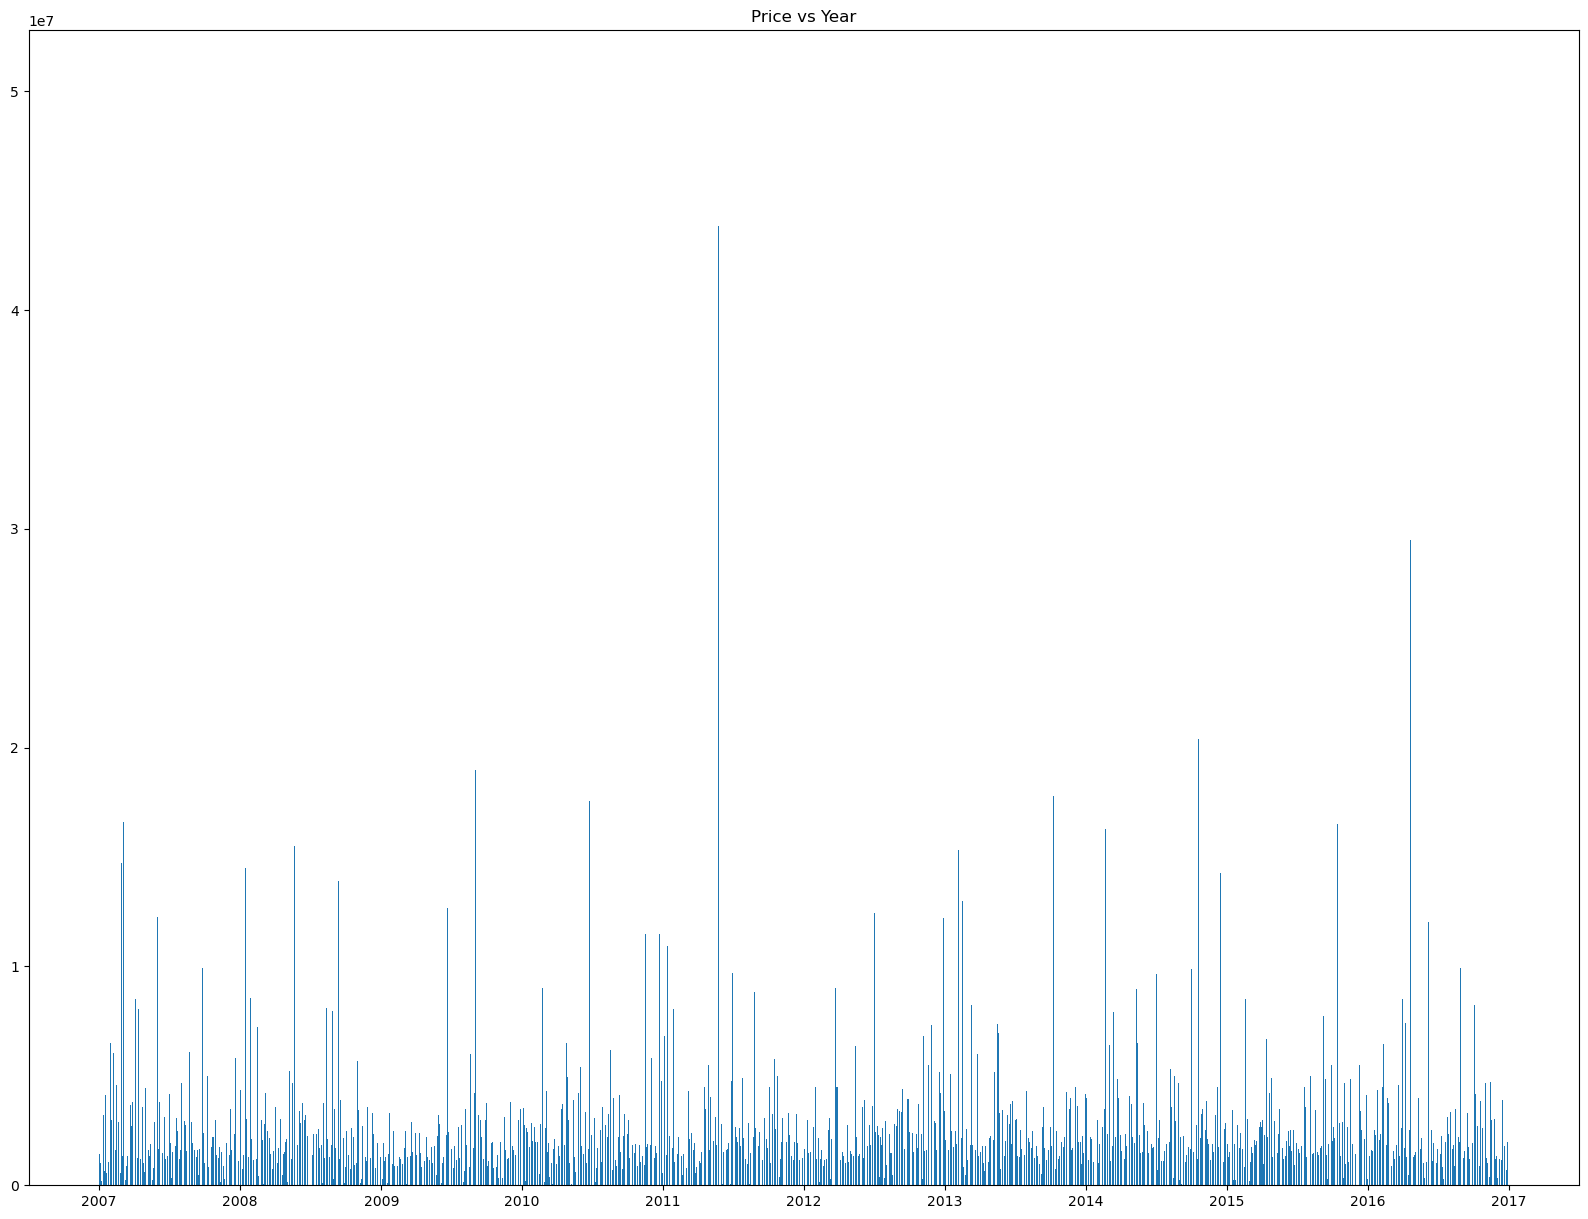

In [348]:
plt.figure(figsize=(20, 15))
plt.bar(merged_df['Year'], merged_df['price'])
plt.title('Price vs Year')
plt.show()


# Plotting
plt.figure(figsize=(12, 8))

plt.bar(merged_df['Year'], merged_df['Count'], color='green', label='Count')

plt.title('Homelessness Counts over Time')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2444\408624684.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


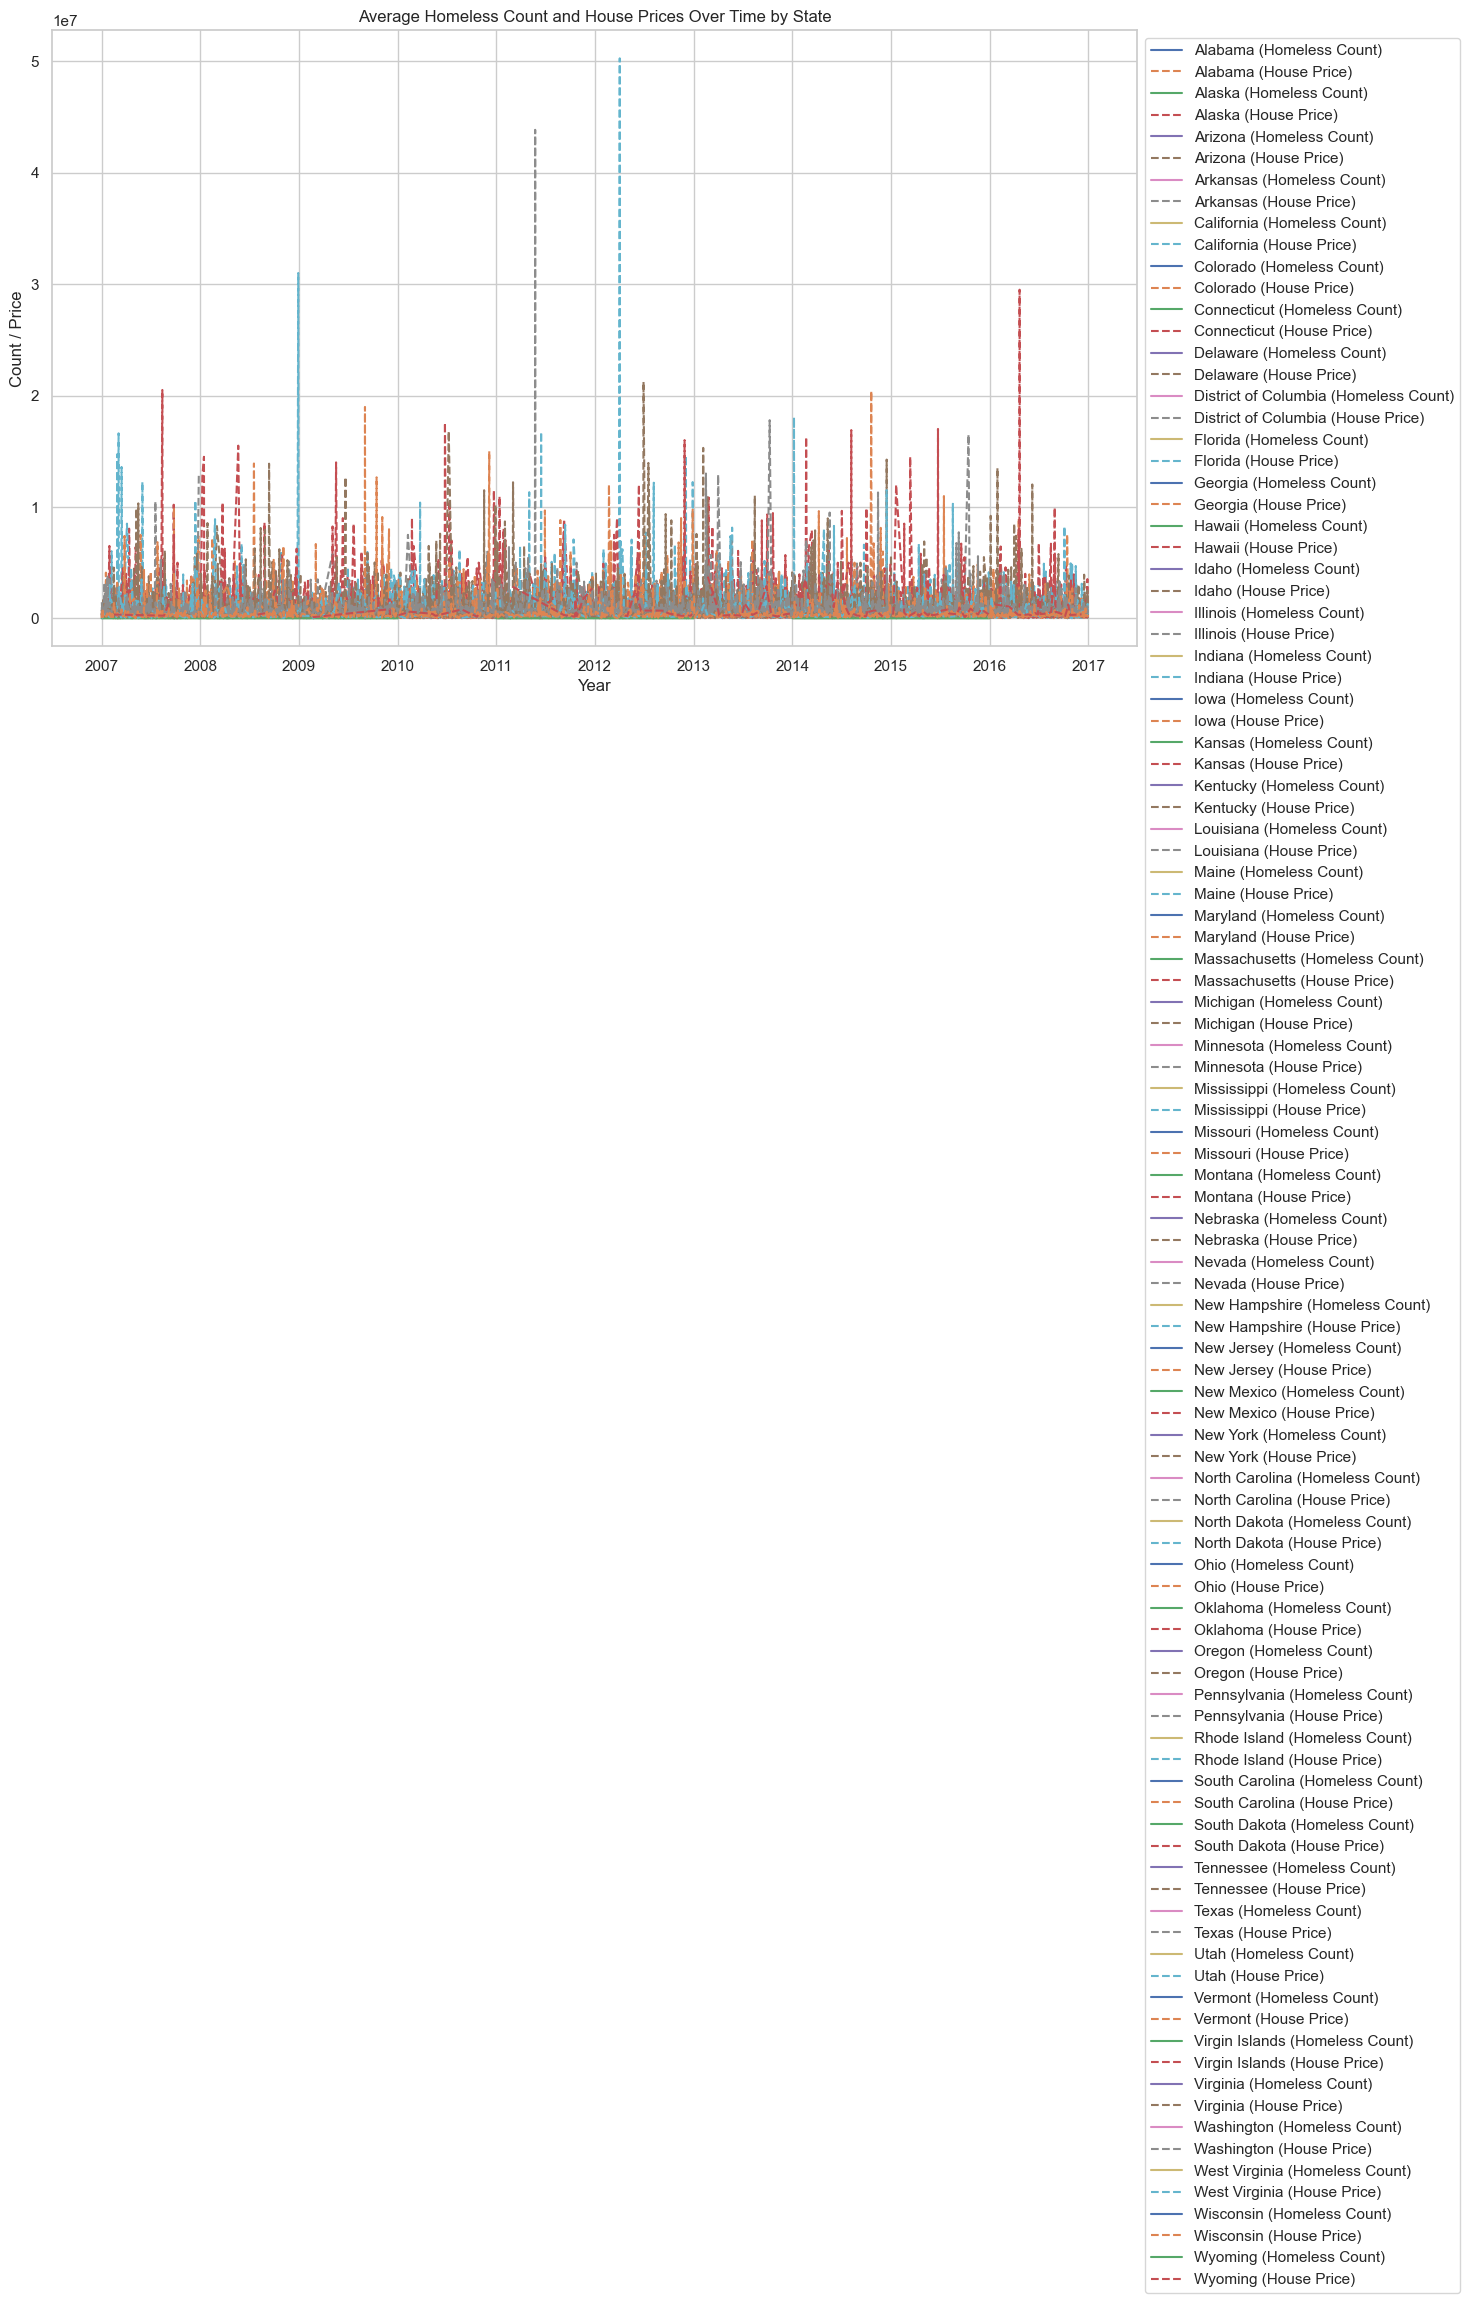

In [349]:
# Set plot style
sns.set(style="whitegrid")

# Group data by year and state, calculating the mean 'price'
grouped_data = merged_df.groupby(['Year', 'State']).agg({'Count': 'mean', 'price': 'mean'}).reset_index()

# Plot the data
plt.figure(figsize=(14, 8))

# Loop through each state to plot its data
for state in grouped_data['State'].unique():
    state_data = grouped_data[grouped_data['State'] == state]
    plt.plot(state_data['Year'], state_data['Count'], label=f"{state} (Homeless Count)")
    plt.plot(state_data['Year'], state_data['price'], linestyle='--', label=f"{state} (House Price)")

plt.xlabel('Year')
plt.ylabel('Count / Price')
plt.title('Average Homeless Count and House Prices Over Time by State')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Group data by year and state, calculating the sum for 'Sheltered' and 'Unsheltered'
shelter_data = merged_df.groupby(['Year', 'State']).agg({'Sheltered': 'sum', 'Unsheltered': 'sum'}).reset_index()

# Plot the data
plt.figure(figsize=(14, 8))

# Loop through each state to plot its data
for state in shelter_data['State'].unique():
    state_data = shelter_data[shelter_data['State'] == state]
    plt.plot(state_data['Year'], state_data['Sheltered'], label=f"{state} (Sheltered)", linestyle='-')
    plt.plot(state_data['Year'], state_data['Unsheltered'], label=f"{state} (Unsheltered)", linestyle='--')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sheltered vs. Unsheltered Homeless Over Time by State')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2444\408624684.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


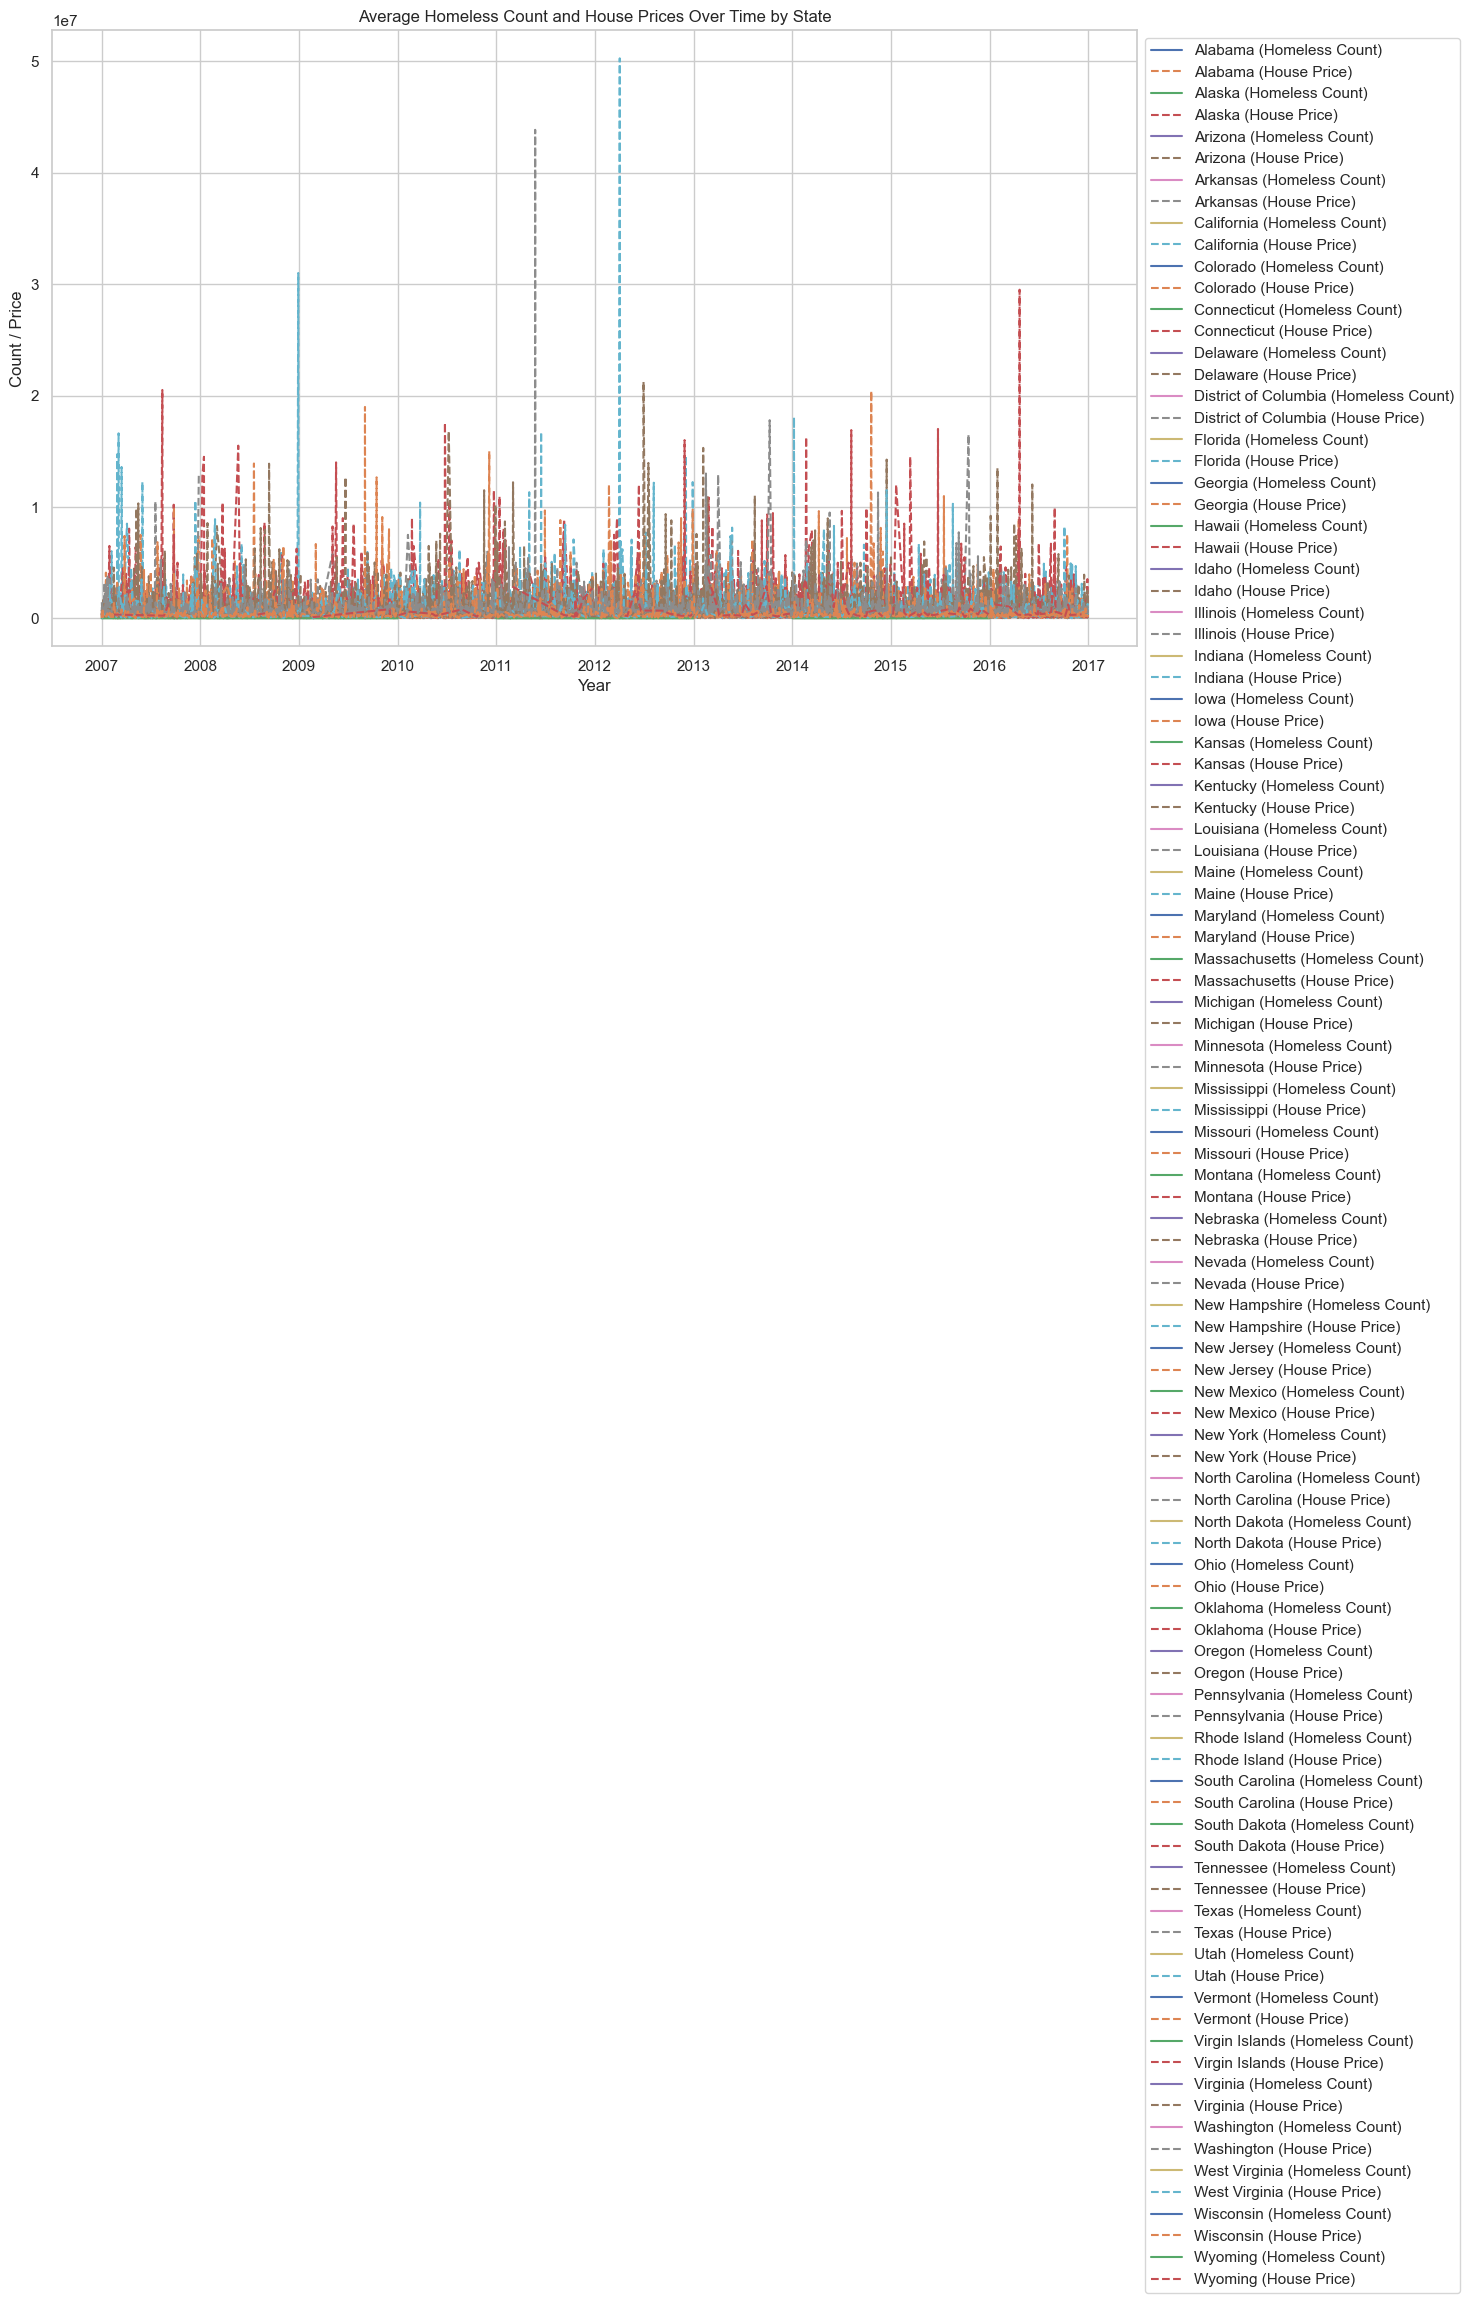

In [356]:
# Set plot style
sns.set(style="whitegrid")

# Group data by year and state, calculating the mean 'price'
grouped_data = merged_df.groupby(['Year', 'State']).agg({'Count': 'mean', 'price': 'mean'}).reset_index()

# Plot the data
plt.figure(figsize=(14, 8))

# Loop through each state to plot its data
for state in grouped_data['State'].unique():
    state_data = grouped_data[grouped_data['State'] == state]
    plt.plot(state_data['Year'], state_data['Count'], label=f"{state} (Homeless Count)")
    plt.plot(state_data['Year'], state_data['price'], linestyle='--', label=f"{state} (House Price)")

plt.xlabel('Year')
plt.ylabel('Count / Price')
plt.title('Average Homeless Count and House Prices Over Time by State')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average number of homeless people for each state over time:
   # Group the data by 'State' and 'Year'.
   # Calculate the average of the 'Count' column.

###### Group by 'State' and 'Year', calculate average of 'Count'
average_homeless = merged_df.groupby(['State', 'Year'])['Count'].mean().reset_index()

print(average_homeless)

This visualls does not give informations,so I have to seperate it.

First plot should be about homeless for a X states in a scatter plot, 

X axis = years, Y axis = pricess. graph for pricess will be compared to graph of Homelessness count for the same X state. 

(Homelessness graph)X axis = years, Y axis = Count-of homelessness-. 

Or a speciall line for Homelessness and a line for pricess for X state, 

So for that all should be in a one function. 



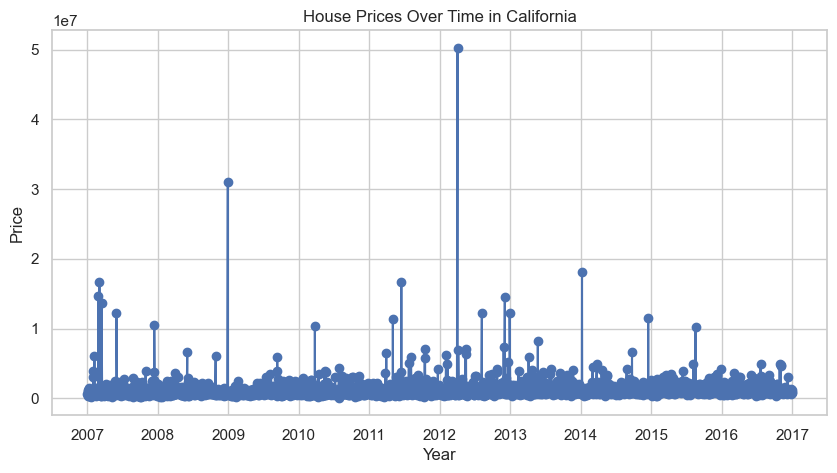

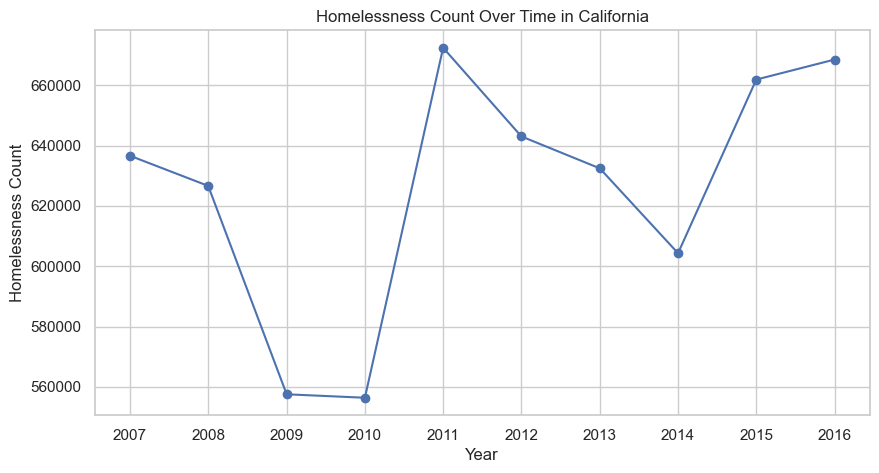

In [358]:
def plot_prices_and_homelessness_count(df, state):
    # Filter the dataframe for the specified state
    state_data = df[df['State'] == state]

    # Create a graph for prices over time
    plt.figure(figsize=(10, 5))
    plt.plot(state_data['Year'], state_data['price'], marker='o', linestyle='-')
    plt.title(f'House Prices Over Time in {state}')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

    # Create a graph for homelessness count over time
    plt.figure(figsize=(10, 5))
    plt.plot(state_data['Year'], state_data['Count'], marker='o', linestyle='-')
    plt.title(f'Homelessness Count Over Time in {state}')
    plt.xlabel('Year')
    plt.ylabel('Homelessness Count')
    plt.show()

# Example usage
plot_prices_and_homelessness_count(merged_df, 'California')

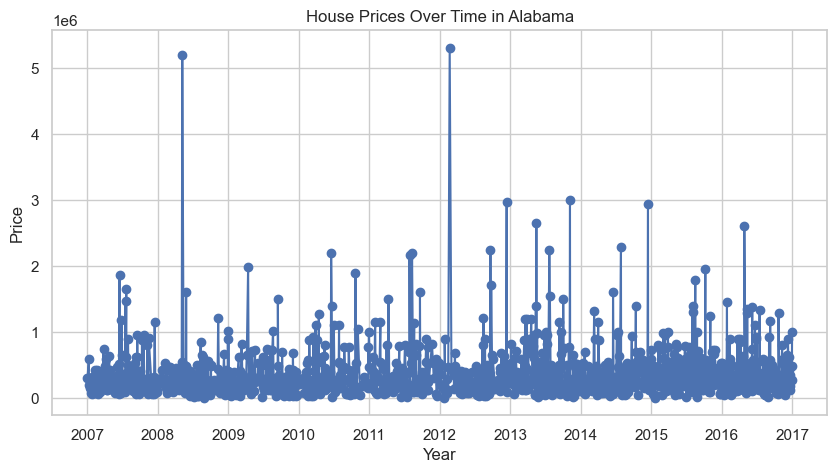

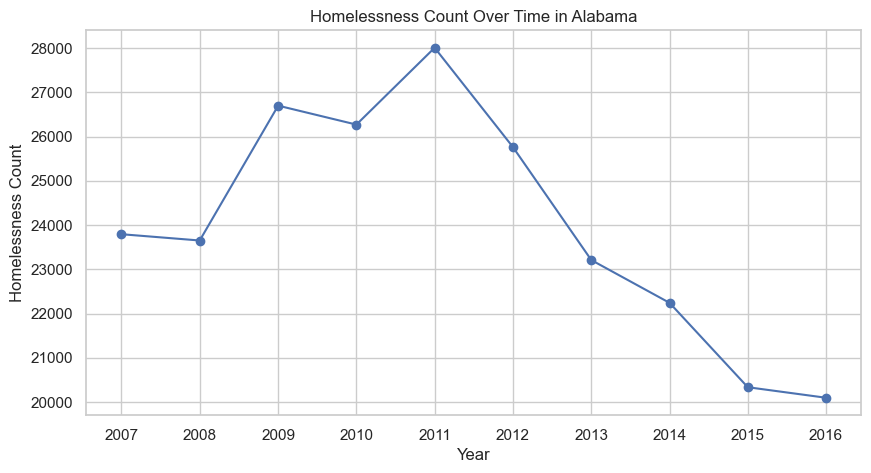

In [360]:
plot_prices_and_homelessness_count(merged_df, 'Alabama')

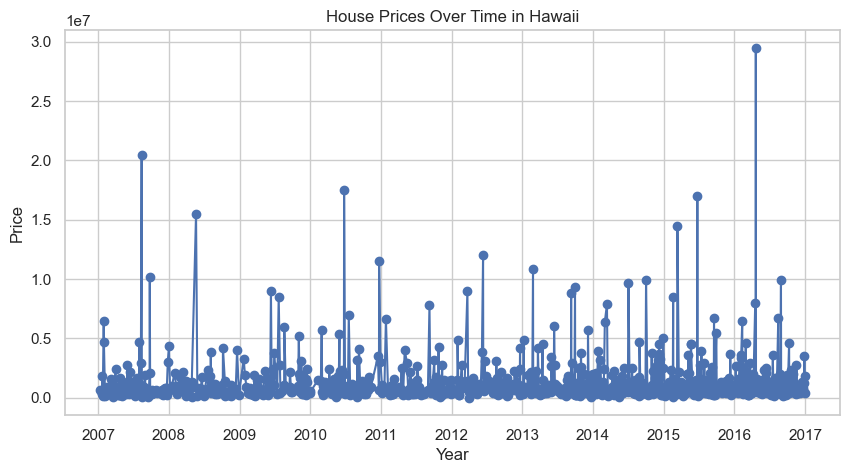

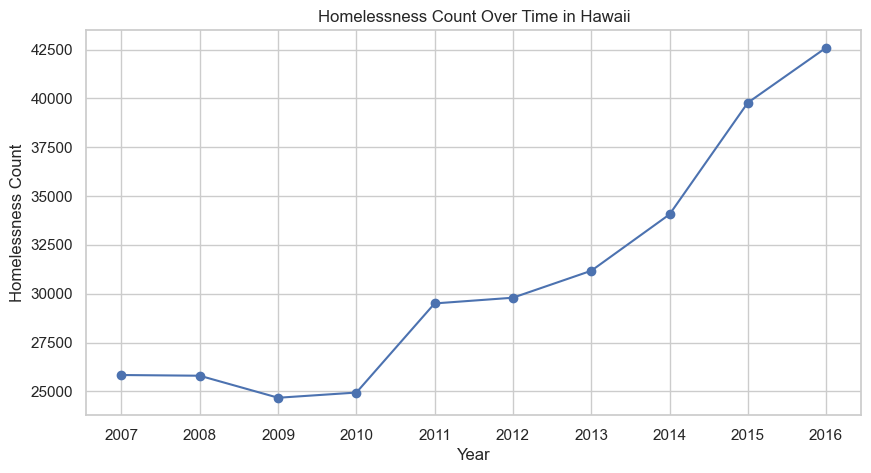

In [364]:
plot_prices_and_homelessness_count(merged_df, 'Hawaii')

# Conclusion  

There are so many factors affect the number of homeless, and maybe they change from one state to another, California after a great  increase in price that affected a lot of people in the long term, we can observe two kinds of homelessness one, from a long effect of high prices and another from the immediately. 

In general, High prices affect the number of homeless people. 



###### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

I would make the day by day data, a yearly data with mean price. 
I would to plot first so to see the observations from the first step instead of the infom and shape.
I would like to know the "Shelter" and "Unshelter" people in every year, 
and for professional studies I would study the long and short term.